# Probabilistic Programming

These are my notes on the "Probabilistic Programming" section of the book "Bayesian Analysis with Python" by Osvaldo Martin. The book is available at [Packt](https://www.packtpub.com/en-us/product/bayesian-analysis-with-python-9781789341652) at the time of writing this. I encourage everyone to go get a copy of the book as it is easy to follow and contains a lot of practical examples, as well as references to other resources if you want to dig deeper into Bayesian Statistics.

## On Bayes Theorem

Before I write further notes on the topic, I want to try to explain the core concept behind this alternative approach to statistics: **Bayes Theorem** and how it relates to **Bayesian statistics**. Bayes' Theorem is a fundamental concept in probability theory that describes how to update the probability of a hypothesis as more evidence or information becomes available. Mathematically, it is expressed as:

$$P(H|E) = \frac{P(E|H) \cdot P(H)}{P(E)}$$

Where:

- $P(E|H)$ is the probability of observing the evidence ($E$) if the hypothesis ($H$) is true. This is generally called the **likelihood** term in Bayes Theorem.
- $P(H)$ is the prior probability of the hypothesis ($H$) being true. This is the probability of the hypothesis before any evidence is considered, and it plays a role on how much prior information we have about the hypothesis. This is conviniently called the **prior probability** term in Bayes Theorem.
- $P(E)$ is the probability of observing the evidence ($E$) regardless of the hypothesis. This term works as a normalization term in the relationship established by Bayes Theorem and is generally called the **marginal likelihood** term.
- $P(H|E)$ is the probability of the hypothesis ($H$) being true given the evidence ($E$). This is the probability of the hypothesis after the evidence is considered, and it is called the **posterior probability** term in Bayes Theorem.

If we look at what Bayes' Theorem says closely, we are basically transforming our initial belief about a hypothesis ($P(H)$) into a new belief ($P(H|E)$) after we observe some evidence ($E$). This is done by multiplying our prior belief by the likelihood of the evidence given the hypothesis, and then dividing by the probability of observing the evidence regardless of the hypothesis. This is a very powerful concept because it allows us to update our beliefs in a principled way as we observe more evidence.

Note that this is saying nothing about the amount of data we need to collect or how confident we are in our prior beliefs. Given enough data, we will keep updating the posterior probability of the hypothesis endlessly. This is the essence of Bayesian statistics: we are always updating our beliefs as we observe more data.

At the moment of writing this, my code autocompletion tool was suggesting that I wrote the following sentence above, which I found misleading:

```text
"Given enough data, we will keep updating the posterior probability of the hypothesis until we reach a single value."
```

I find this to be completely incorrect under the Bayesian framework so I wanted to point that out. The core concept of Bayesian statistics is that we will keep updating our beliefs as we observe more data. The hidden assumption here is not that we are tracking one "misterious hidden value" that solves all our problems, but that we will keep updating our beliefs as this value we are trying to estimate keeps changing. This is a very important distinction to make, which will be explained in more detail below.

## On Frequentist vs Bayesian Statistics

In order to understand why this is different to traditional statistics taught in middle school, we need to understand the difference between **Frequentist** and **Bayesian** statistics. Below I'll write down my interpretation of both frameworks, and how they differ from each other. We'll do that with an example to make things clearer.

### Scenario: Modeling Call Center Events Per Hour

Suppose you manage a call center and want to model the number of calls received per hour. You have historical data showing the number of calls received in each of the last 500 hours. The goal is to estimate the average number of calls per hour, denoted by $\lambda$, and we are trying to predict the number of calls in future hours.

Before moving forwards, it's interesting to see what your initial approach would be to solve this problem. In my case, I have a stronger background in frequentist statistics, so when I thought about this problem my mind immediately went that route.

#### Frequentist Approach

**1) Modeling and Estimation:**

The frequentist would typically assume that the number of calls follows a Poisson distribution with a rate parameter $\lambda$. The Poisson distribution is appropriate here as it models the number of events occurring in an interval of time or space. The probability mass function of the Poisson distribution is:

$$P(X = k | \lambda) = \frac{\lambda^k e^{-\lambda}}{k!}$$

**2) Estimation of lambda:**

There are multiple approaches to estimate the value of $\lambda$, but a very common approach is to use the **Maximum Likelihood Estimation (MLE)**. Without going into much detail, in MLE, given the observed data we calculate the value of $\lambda$ that maximizes the likelihood of observing that data. So our estimate of the parameter $\hat{\lambda}$ would be:

$$\hat{\lambda} = \frac{1}{n} \sum_{i=1}^{n} x_i$$

Where $x_i$ is the number of calls received in the $i$-th hour, and $n$ is the total number of hours observed. This is just the mean of the observed sample data.

**3) Inference:**

We generally will not be satisfied with the point estimate of $\lambda$, we will want to make inference. In the frequentist framework, we would typically calculate a confidence interval for $\lambda$ using the Central Limit Theorem. This would give us a range of values where we are confident that the true value of $\lambda$ lies. The frequentist considers $\hat{\lambda}$ to be the best point estimate for $\lambda$, given the observations.

**4) Belief about the underlying parameter $\lambda$:**

The frequentist believes there is a true, fixed value of $\lambda$ that we are estimating. This value is inherent to the **population** we are trying to model. Given a set of observations, we compute the best estimate of that parameter, where the data provides a point estimate, and the confidence interval reflects how sure we are about it. There is a lot of discussion about whether this confidence interval actually reflects the uncertainty in the parameter, but that's a topic for another day.

#### Bayesian Approach

**1) Modeling and Estimation:**

The Bayesian also models the number of calls per hour using a Poisson distribution with a rate parameter $\lambda$. However, the key difference is that the Bayesian approach considers $\lambda$ as a random variable, not a fixed parameter. The output of a Bayesian estimate will return a **distribution** of values for $\lambda$, instead of a single point estimate.

**2) Estimation of lambda:**

**Prior Distribution:** Before looking at the data, the Bayesian specifies a prior distribution for $\lambda$, reflecting any prior beliefs or knowledge. For instance, based on experience, one might assume $\lambda$ follows a Gamma distribution (a common choice as it is the conjugate prior for the Poisson distribution):

$$\lambda \sim \text{Gamma}(\alpha, \beta)$$

Where $\alpha$ and $\beta$ are hyperparameters representing prior knowledge about the rate of calls per hour.

**Posterior Distribution:** After observing the data, (e.g., 500 hours of call data), the Bayesian updates this prior belief to form a posterior distribution for $\lambda$, using Bayes’ Theorem (as shown above):

$$ P(\lambda | X) \propto P(X | \lambda) \cdot P(\lambda) $$

Where $P(\lambda | X)$ is the likelihood (the probability of observing the data given $\lambda$) and $P(\lambda)$ is the prior. The result is a new distribution for, incorporating both prior beliefs and the observed data.

**3) Inference:**

The Bayesian’s estimate of $\lambda$ is often taken as the mean or median of the posterior distribution. The entire posterior distribution reflects the uncertainty about $\lambda$, offering a complete picture rather than just a point estimate.

**4) Belief about the underlying parameter $\lambda$:**

The Bayesian believes that $\lambda$ has a distribution of possible values. The data helps to update this belief, refining the distribution to better reflect reality. The final belief about $\lambda$ is not just a single value but a range of probable values, weighted according to the posterior distribution.

### Comparing both Approaches

**Frequentist:** Treats $\lambda$ as a fixed, unknown parameter and provides a single estimate $\hat{\lambda}$ with associated confidence intervals. The belief is that there is a true $\lambda$, and we can estimate it as accurately as the data allows.

**Bayesian:** Treats $\lambda$ as a random variable with its own distribution, which evolves as more data is observed. The final result is a full distribution reflecting the uncertainty about $\lambda$, incorporating both prior knowledge and new evidence. Of course, if our estimate is correct the variance of the posterior distribution will decrease as we observe more data, which in most cases will make it look more and more similar to the frequentist value.

# Coding some examples

## Flipping coins

Building a simple example of coin flipping a biased coin.

In [1]:
import numpy as np
import preliz
import pymc

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
def flip_coins(n_trials: int, real_bias: float, seed: int = None) -> np.ndarray:
    """Generates a sample of coin flips with a given bias of the coin 
    falling on heads.
    """
    np.random.seed(seed)

    return preliz.Binomial(n=1, p=real_bias).rvs(n_trials)

In [3]:
# Generate a sample of 10 coin flips with a 20% probability of heads
data = flip_coins(10, 0.2, 42)

data

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

We generated this data, but we will work under the assumption that this data was obtained from a real coin flip experiment and it's the result of some data gathering process for which we don't know the underlying probability of heads.

## Generating the model

After getting the data, we need to generate our model. Just like in the previous examples, we want to model $y$ as the number of heads in $n$ coin flips. We will assume that $y$ follows a binomial distribution with parameters $n = 1$ (1 coin toss) and $p$, where $p$ is the probability of getting heads in a single coin flip. We don't have information about $p$, which is the parameter that we want to estimate. Therefore, we can set our model as follows:

$$\theta \sim Beta(\alpha=1, \beta=1)$$
$$Y \sim Binomial(n=1, p=\theta)$$

Where $\theta$ is the parameter of a distribution of how "biased" the coin is. Note that in this model, we are assigning a probability distribution to $\theta$. This reflects our previous (and probably uninformed) belief about the behaviour of $\theta$, captured in a probability distribution of the parameter. The other variable $Y$ is just the outcome given the probability. Note that now $\theta$ has a distribution (a Beta distribution) assigned to it. This Beta distribution is similar to a uniform ranging from [0, 1], which represents an uniformative prior beliwf.

In [4]:
with pymc.Model() as model:
    theta = pymc.Beta('theta', alpha=1.0, beta=1.0)
    y = pymc.Bernoulli('y', p=theta, observed=data)

    trace = pymc.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


/Users/davidovichm/Desktop/Michel/bayesian_analysis_python/env/lib/python3.11/site-packages/rich/live.py:231: 
UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


## Visualizing the Posterior

Now we have to visualize the posterior distribution of $\theta$ given the data. We can do this by sampling from the posterior distribution and plotting a histogram of the samples. The posterior distribution of $\theta$ is the "updated" distribution after observing the data, if we want to use the Bayesian term for it.

Note that in the previous lines logs we see something like: "Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total)...". Below we will see 4 different "traces", these are obtained by running 4 different chains of the MCMC algorithm. This is done to ensure that the algorithm is converging to the same posterior distribution. If the traces are very different from each other, it might be a sign that the algorithm is not converging properly. Note I'm calling this plots "traces" but the formal terminology for this (in PyMC and in MCMC algorithms in general) is 'chains'.

The posterior in these type of algorithm is obtained by numerically sampling from the posterior distribution. This is done by running a Markov Chain Monte Carlo (MCMC) algorithm, which is a class of algorithms that allow us to sample from complex probability distributions. The algorithm is based on the idea of constructing a Markov Chain that converges to the desired distribution, and then sampling from that chain.

In [5]:
import arviz

array([[<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>]], dtype=object)

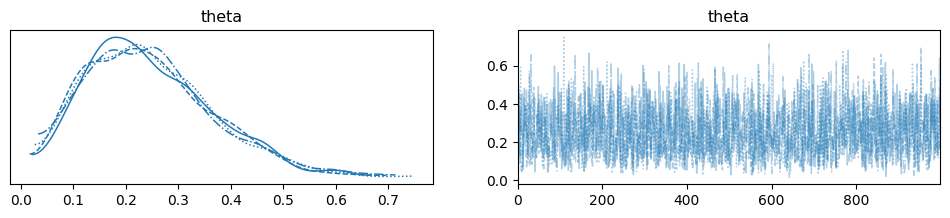

In [6]:
arviz.plot_trace(trace)

array([[<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}, xlabel='Rank (all chains)', ylabel='Chain'>]],
      dtype=object)

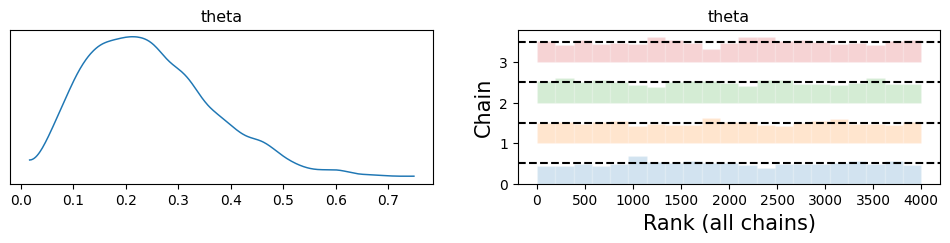

In [7]:
arviz.plot_trace(trace, kind='rank_bars', combined=True)

In [8]:
arviz.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.246,0.12,0.049,0.472,0.003,0.002,1638.0,2716.0,1.0


### Results

This is a very oversimplified example with a very small number of coin flips, but we can check that if we increase the number of "coin flips" we generate, we increase the certainty of our estimate. This is a very important concept in Bayesian statistics: the more data we have, the more certain we are about our estimates. If we rerun this as we will do below, with 1.000 samples instead of 10, we will see that the posterior distribution will be much more concentrated around the true value of the parameter, and the mean of the posterior distribution will be much closer to the true value (0.2).

In [9]:
more_data = flip_coins(1_000, 0.2, 42)

In [10]:
with pymc.Model() as model:
    theta = pymc.Beta('theta', alpha=1.0, beta=1.0)
    y = pymc.Bernoulli('y', p=theta, observed=more_data)

    trace_1000 = pymc.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


/Users/davidovichm/Desktop/Michel/bayesian_analysis_python/env/lib/python3.11/site-packages/rich/live.py:231: 
UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


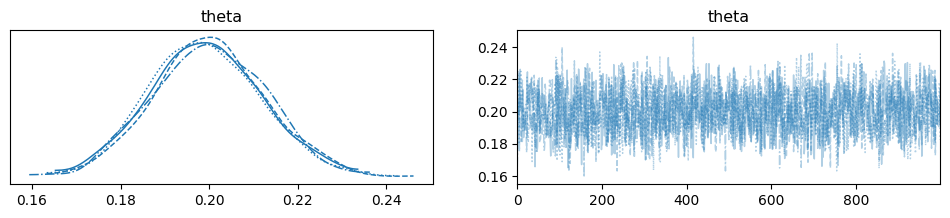

In [11]:
arviz.plot_trace(trace_1000);

array([[<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}, xlabel='Rank (all chains)', ylabel='Chain'>]],
      dtype=object)

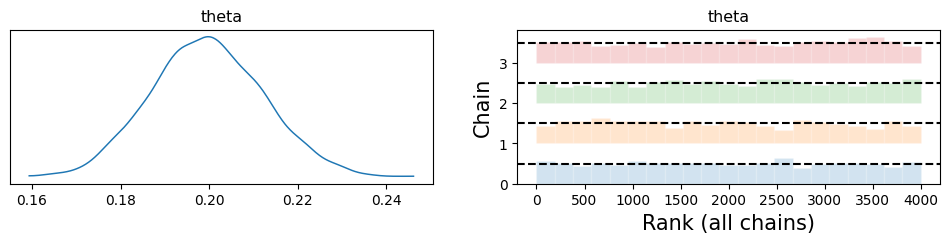

In [12]:
arviz.plot_trace(trace_1000, kind='rank_bars', combined=True)

In [13]:
arviz.summary(trace_1000)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.2,0.013,0.176,0.223,0.0,0.0,1907.0,3070.0,1.0


Beautiful! Not only do we see the mean is precisely 0.2 as we set in out data example, but also the "spread" of the parameter is much more condensed around the estimated mean value. This is another very cool feature of Bayesian Statistics: if we keep gathering informative data, we will continue to update our beliefs and be more confident on what possible values the parameter can take. Let's review that by plotting the posterior using arviz, which allows us to plot the HDI (Highest Density Interval) of the posterior distribution. This is a credible interval that contains the true value of the parameter with a certain probability. In this case, we are plotting the 94% HDI, which means that the true value of the parameter has a 94% chance of being inside the interval.

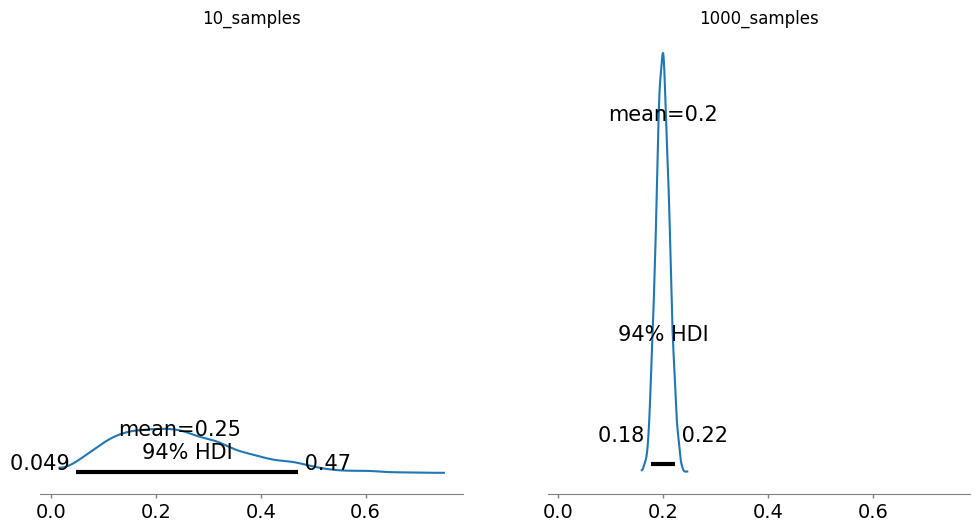

In [14]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12, 6))

posterior_dict = {
    '10_samples': [axis[0], trace],
    '1000_samples': [axis[1], trace_1000]
}

for title, (ax, trc) in posterior_dict.items():
    arviz.plot_posterior(trc, ax=ax)
    ax.set_title(title)

In [15]:
arviz.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.246,0.12,0.049,0.472,0.003,0.002,1638.0,2716.0,1.0


In [16]:
arviz.summary(trace_1000)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.2,0.013,0.176,0.223,0.0,0.0,1907.0,3070.0,1.0


The plots above represent the posterior distribution for each experiment. Note that on the first experiment (on the left) we do not have much information about the "bias" of the coin, as we have only performed 10 flips. Note that we can still say that we are 94% confident that the coin is not fair (with only 10 samples) because the HDI does not contain the value 0.5. However, as we increase the number of samples, we can see that the HDI becomes more and more concentrated around the true value of the parameter (0.2), and the mean of the posterior distribution becomes closer to the true value. By the end of the experiment with 1000 samples, we are 94% confident that the true value is between 0.177 and 0.224, which is a much narrower interval.

A good way of visualizing how much "evidence" we gathered by computing the posterior is by plotting the Savage-Dickey Density Ratio (SDDR). This is a ratio of the prior density at a certain point and the posterior density at the same point. This ratio is a measure of how much the data has changed our beliefs about the parameter. If the ratio is much greater than 1, it means that the data has provided strong evidence in favor of the parameter being at that point. If the ratio is close to 1, it means that the data has not provided much evidence in favor of the parameter being at that point. Let's plot the SDDR for the parameter $\theta = 0.2$ for each experiment.

In [18]:
type(trace)

arviz.data.inference_data.InferenceData

### Bayes Factor and Savage-Dickey Density Ratio

Bayes Factor is a measure of how much the data has changed our beliefs about the parameter. It is defined as the ratio of the marginal likelihood of the data under the prior and the marginal likelihood of the data under the posterior. If the Bayes Factor is much greater than 1, it means that the data has provided strong evidence in favor of the parameter being at that point. If the Bayes Factor is close to 1, it means that the data has not provided much evidence in favor of the parameter being at that point.

The Savage-Dickey Density Ratio (SDDR) is a special case of the Bayes Factor, where we are interested in the ratio of the prior density at a certain point and the posterior density at the same point. This ratio is a measure of how much the data has changed our beliefs about the parameter as well.

In arviz, we will get BF_10 and BF_01 as two distinct values at the reference value we select. BF_10 is the Bayes Factor in favor of the alternative hypothesis (the parameter being at the reference value), and BF_01 is the Bayes Factor in favor of the null hypothesis (the parameter not being at the reference value). If BF_10 can be interpreted as how much likely our hypothesis ($\theta = 0.2$) is given the data, and BF_01 can be interpreted as how much likely the null hypothesis is ($\theta \neq 0.2$) given the data. The 0.2 here is the reference value we are using to compute the Bayes Factor in `arviz.plot_bf(...)`.

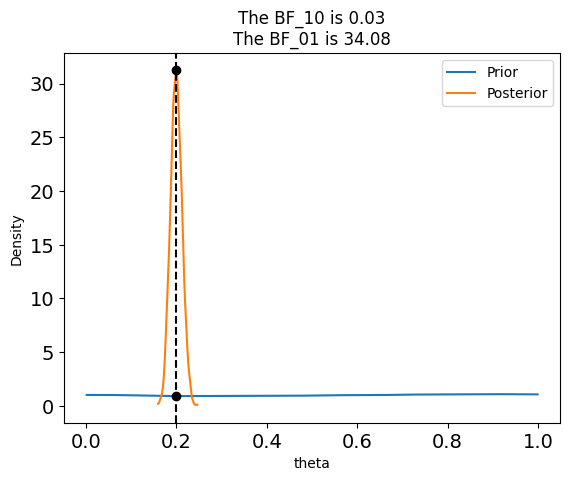

In [24]:
arviz.plot_bf(trace_1000, prior=np.random.beta(1, 1, 1000), var_name="theta", ref_val=0.2);

### Region of Practical Equivalence (ROPE)

Mathematical equality is an incomprehensibly strict condition, and unobtainable in practice when dealing with probability distributions. Assuming that in our example $\theta = 0.2$ is the true value of the parameter, we can still get a mean estimate of `0.208` and be very confident about our results, even though they are not strictly the same. Even if we had an HDI of [0.19999, 0.20001], the probability of selecting exactly 0.2 is still zero, as we are dealing with continuous distributions. This is why we define a Region of Practical Equivalence (ROPE), which is a range of values that we consider to be practically equivalent to the true value. 

Imagine in this case we want to test if the coin is actually a "fair" coin, so if $X$ represents the outcome of an experiment, $X \in \text{[heads, tails]}$, we would expect a fair coin to have $P(X = \text{heads}) = 0.5 = \theta$ In this case, we can define a ROPE of [0.45, 0.55], which is a range of values around 0.5 that we consider to be practically equivalent to the true value. This is a very useful concept when we are dealing with continuous distributions and we want to define a range of values that we consider to be equivalent to the true value.

Text(0.5, 1.0, '1000 samples')

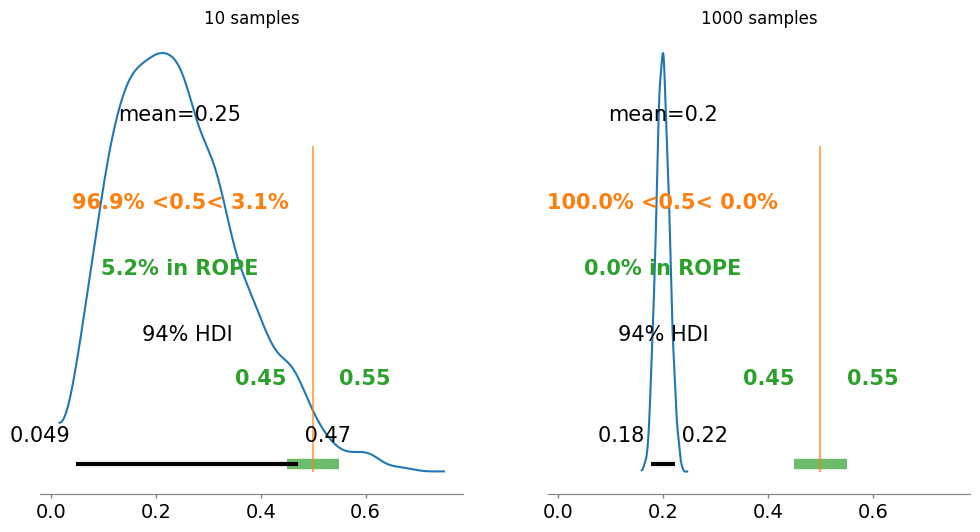

In [31]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12, 6))

arviz.plot_posterior(trace, rope=[0.45, 0.55], ref_val=0.5, ax=ax[0])
ax[0].set_title('10 samples')

arviz.plot_posterior(trace_1000, rope=[0.45, 0.55], ref_val=0.5, ax=ax[1])
ax[1].set_title('1000 samples')